### Predicting Boston House Prices With Regression

In [1]:
import pandas as pd
import numpy as np

In [2]:
Boston = pd.read_csv('BostonHousing.csv')

In [3]:
Boston.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


###### CRIM - per capita crime rate by town
###### ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
###### INDUS - proportion of non-retail business acres per town.
###### CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
###### NOX - nitric oxides concentration (parts per 10 million)
###### RM - average number of rooms per dwelling
###### AGE - proportion of owner-occupied units built prior to 1940
###### DIS - weighted distances to five Boston employment centres
###### RAD - index of accessibility to radial highways
###### TAX - full-value property-tax rate per 10,000 dolars
###### PTRATIO - pupil-teacher ratio by town
###### B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
###### LSTAT - % lower status of the population
###### MEDV  - Median value of owner-occupied homes in 1000's dolars

In [4]:
Boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [5]:
Boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [6]:
Boston.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

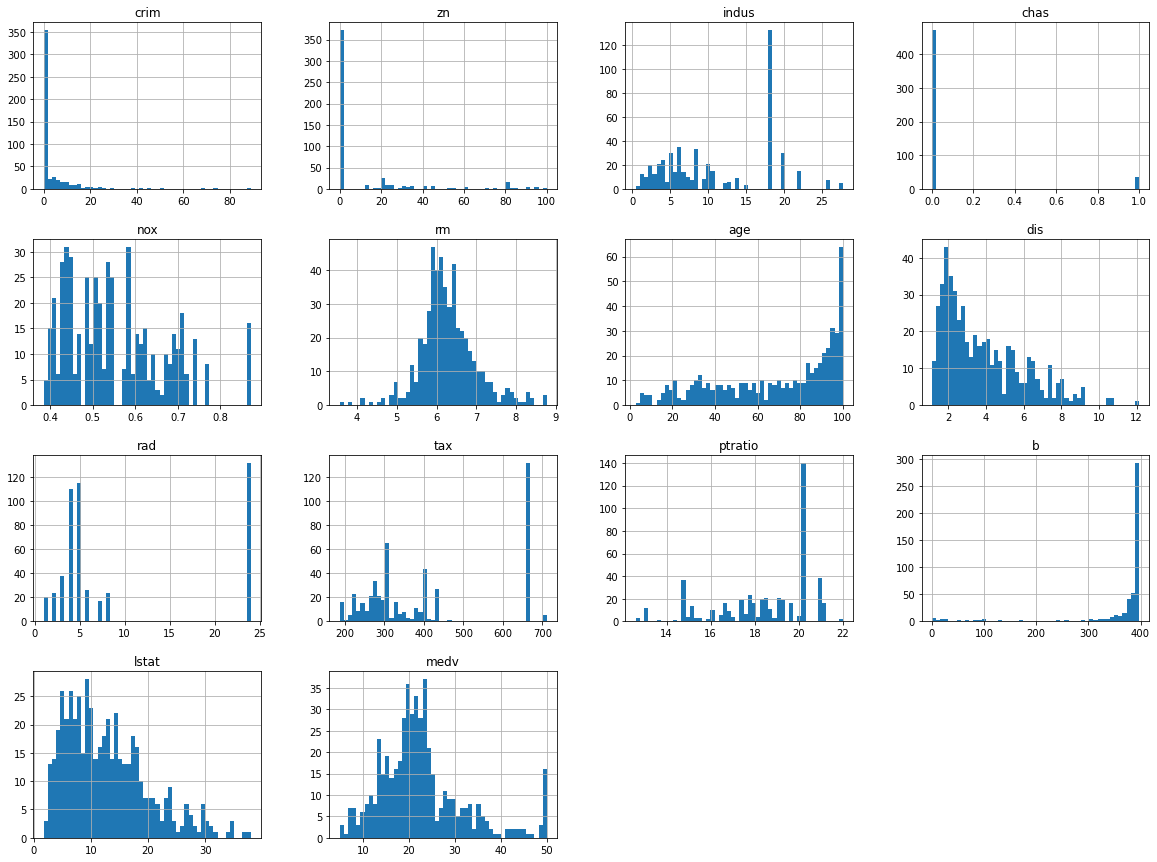

In [7]:
import matplotlib.pyplot as plt
Boston.hist(bins=50, figsize=(20, 15));

In [8]:
corr_matrix = Boston.corr().round(3)
corr_matrix
corr_matrix["medv"].sort_values(ascending=False)

medv       1.000
rm         0.695
zn         0.360
b          0.333
dis        0.250
chas       0.175
age       -0.377
rad       -0.382
crim      -0.388
nox       -0.427
tax       -0.469
indus     -0.484
ptratio   -0.508
lstat     -0.738
Name: medv, dtype: float64

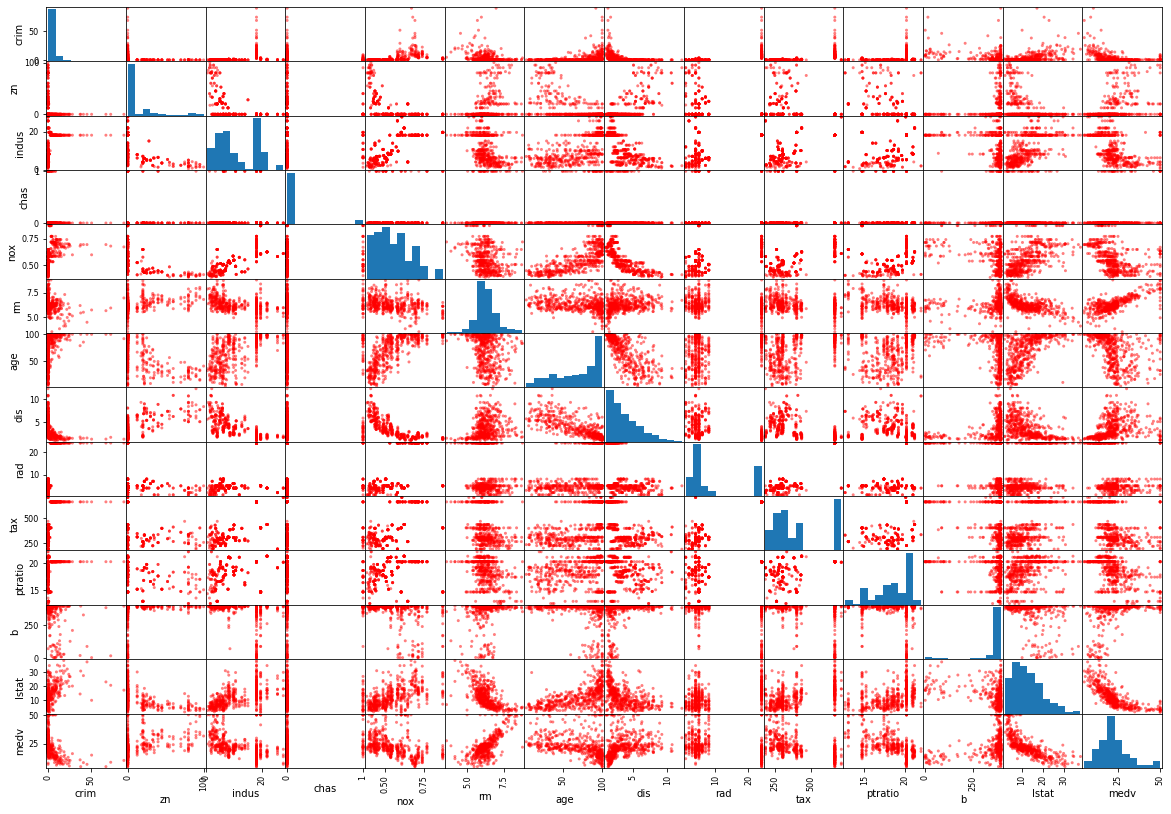

In [9]:
from pandas.plotting import scatter_matrix
scatter_matrix(Boston, figsize = (20, 14) , color = "red");

In [10]:
corr_matrix = Boston.corr().round(3)
corr_matrix

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
crim,1.000,-0.200,0.407,-0.056,0.421,-0.219,0.353,-0.380,0.626,0.583,0.290,-0.385,0.456,-0.388
zn,-0.200,1.000,-0.534,-0.043,-0.517,0.312,-0.570,0.664,-0.312,-0.315,-0.392,0.176,-0.413,0.360
indus,0.407,-0.534,1.000,0.063,0.764,-0.392,0.645,-0.708,0.595,0.721,0.383,-0.357,0.604,-0.484
chas,-0.056,-0.043,0.063,1.000,0.091,0.091,0.087,-0.099,-0.007,-0.036,-0.122,0.049,-0.054,0.175
nox,0.421,-0.517,0.764,0.091,1.000,-0.302,0.731,-0.769,0.611,0.668,0.189,-0.380,0.591,-0.427
rm,-0.219,0.312,-0.392,0.091,-0.302,1.000,-0.240,0.205,-0.210,-0.292,-0.356,0.128,-0.614,0.695
age,0.353,-0.570,0.645,0.087,0.731,-0.240,1.000,-0.748,0.456,0.506,0.262,-0.274,0.602,-0.377
dis,-0.380,0.664,-0.708,-0.099,-0.769,0.205,-0.748,1.000,-0.495,-0.534,-0.232,0.292,-0.497,0.250
rad,0.626,-0.312,0.595,-0.007,0.611,-0.210,0.456,-0.495,1.000,0.910,0.465,-0.444,0.489,-0.382
tax,0.583,-0.315,0.721,-0.036,0.668,-0.292,0.506,-0.534,0.910,1.000,0.461,-0.442,0.544,-0.469


<AxesSubplot:xlabel='indus', ylabel='medv'>

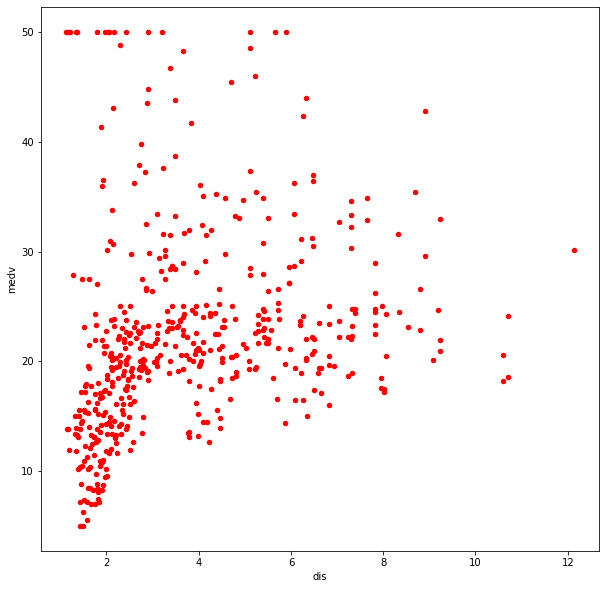

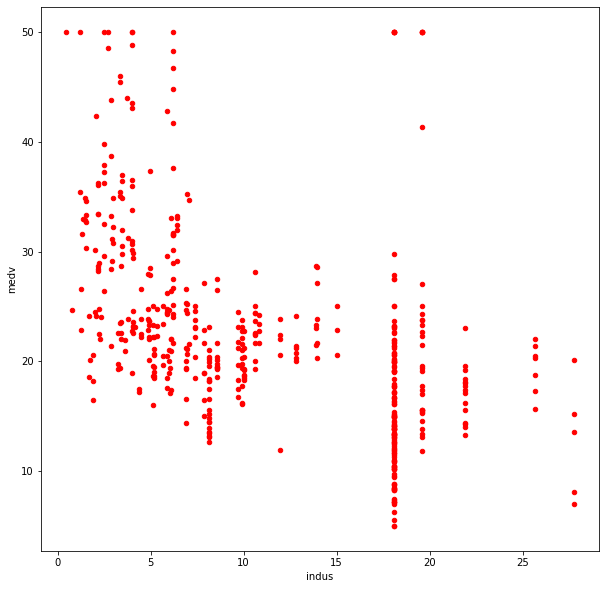

In [11]:
Boston.plot(kind="scatter", x = "dis", y = "medv", color = "red", figsize=(10, 10))
Boston.plot(kind="scatter", x = "indus", y = "medv", color = "red", figsize=(10, 10))

<AxesSubplot:xlabel='lstat', ylabel='medv'>

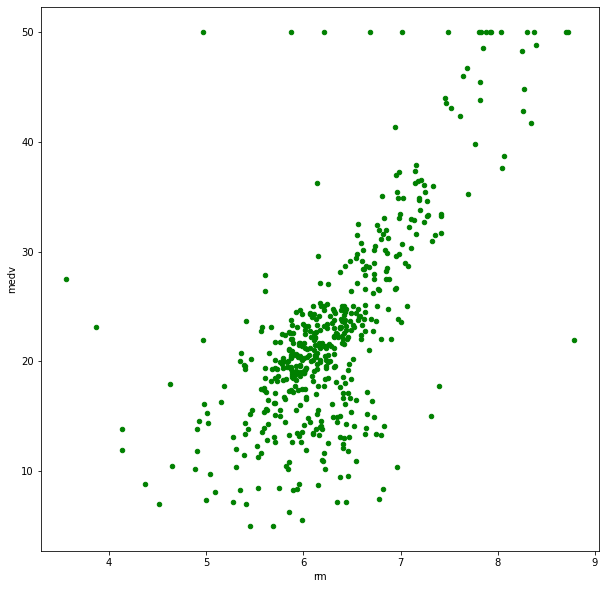

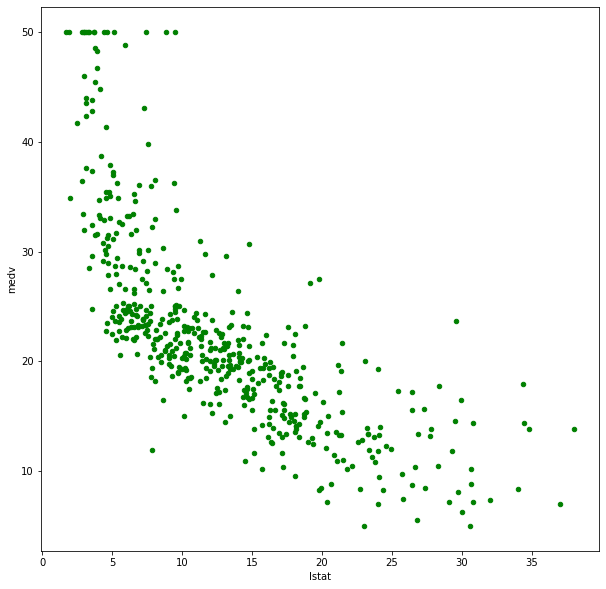

In [12]:
Boston.plot(kind="scatter", x = "rm", y = "medv", color="green",figsize=(10, 10))
Boston.plot(kind="scatter", x = "lstat", y = "medv", color="green", figsize=(10, 10))

### Model training

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [14]:
X = np.c_[Boston['rm'], Boston['lstat']]
Y = Boston['medv']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 35)

In [15]:
linReg = LinearRegression()
linReg.fit(x_train, y_train)

LinearRegression()

In [16]:
linReg.intercept_,
linReg.coef_

array([ 4.91320939, -0.66964724])

In [17]:
#RMSE TRAIN

In [18]:
y_train_pred = linReg.predict(x_train)
y_train_pred
np.sqrt(mean_squared_error(y_train, y_train_pred)).round(3)

5.566

In [19]:
#RMSE TEST

In [20]:
y_test_pred = linReg.predict(x_test)
y_test_pred
np.sqrt(mean_squared_error(y_test, y_test_pred)).round(3)

5.433

In [21]:
#TRAIN

In [22]:
yTrainPredict = linReg.predict(x_train)
r2Train = r2_score(y_train, yTrainPredict).round(3)
print("Training set " 'R2 = {}'.format(r2Train))

Training set R2 = 0.653


In [23]:
#TEST

In [25]:
yTestPredict = linReg.predict(x_test)
r2Test = r2_score(y_test, yTestPredict).round(3)
print("Testing set " 'R2 = {}'.format(r2Test))

Testing set R2 = 0.597
